In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
review = pd.read_csv('encoded_review.csv')
df = pd.read_csv('Tweets.csv')
review

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,0.000000000000000000e+00.32,0.000000000000000000e+00.33,0.000000000000000000e+00.34,0.000000000000000000e+00.35,0.000000000000000000e+00.36,0.000000000000000000e+00.37,0.000000000000000000e+00.38,0.000000000000000000e+00.39,0.000000000000000000e+00.40,4.000000000000000000e+01
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,352.0,161.0,962.0,74.0,4573.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,195.0,16.0,78.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2695.0,1997.0,3316.0,698.0,1508.0,770.0,17.0,305.0,1998.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260.0,29.0,152.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,263.0,61.0,1.0,21.0,4574.0,29.0,152.0,11.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,12.0,231.0,1.0,253.0
14565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1950.0,406.0,45.0,34.0,1.0,65.0,1387.0,8.0,705.0
14566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294.0,278.0,348.0
14567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,214.0,26.0,1.0,97.0,28.0,835.0,1737.0


In [52]:
label = pd.read_csv('encoded_label.csv')
label

,1.000000000000000000e+00
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
14564,1.0
14565,0.0
14566,1.0
14567,0.0


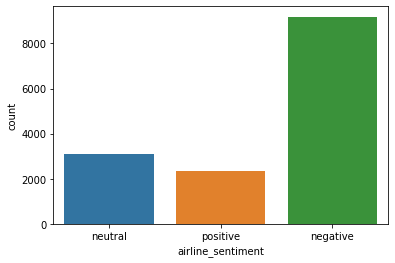

In [16]:
sns.countplot(x='airline_sentiment', data=df)

In [53]:
split_frac = 0.8
split_idx = int(len(review)*split_frac)
train_x, remaining_x = review[:split_idx], review[split_idx:]
train_y, remaining_y = label[:split_idx], label[split_idx:]
test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(11655, 42) 
Validation set: 	(1457, 42) 
Test set: 		(1457, 42)


In [68]:
model1 = Sequential()
model1.add(Embedding(9648, 128,input_length=42))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 42, 128)           1234944   
_________________________________________________________________
lstm_18 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 1,366,657
Trainable params: 1,366,657
Non-trainable params: 0
_________________________________________________________________


In [69]:
model1.fit(train_x, train_y,
          batch_size=30,
          epochs=10,
          validation_data=(val_x, val_y))
score, acc = model.evaluate(test_x,test_y,batch_size=10)
print("Score : ",score)
print("Accuracy : ",acc)

Train on 11655 samples, validate on 1457 samples
Epoch 1/10
11655/11655 [==============================] - 34s 3ms/step - loss: 0.5499 - accuracy: 0.7563 - val_loss: 0.5902 - val_accuracy: 0.7955
Epoch 2/10
11655/11655 [==============================] - 34s 3ms/step - loss: 0.4257 - accuracy: 0.8431 - val_loss: 0.6324 - val_accuracy: 0.7879
Epoch 3/10
11655/11655 [==============================] - 34s 3ms/step - loss: 0.4201 - accuracy: 0.8494 - val_loss: 0.6919 - val_accuracy: 0.7550
Epoch 4/10
11655/11655 [==============================] - 33s 3ms/step - loss: 0.3658 - accuracy: 0.8659 - val_loss: 0.8411 - val_accuracy: 0.7536
Epoch 5/10
11655/11655 [==============================] - 34s 3ms/step - loss: 0.3221 - accuracy: 0.8563 - val_loss: 0.8616 - val_accuracy: 0.7378
Epoch 6/10
11655/11655 [==============================] - 35s 3ms/step - loss: 0.2800 - accuracy: 0.8786 - val_loss: 1.3149 - val_accuracy: 0.7358
Epoch 7/10
11655/11655 [==============================] - 36s 3ms/ste

In [63]:
model = Sequential()
model.add(Embedding(9648, 128,input_length=42))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128,return_sequences=False))
model.add(Dropout(0.5))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 42, 128)           1234944   
_________________________________________________________________
lstm_15 (LSTM)               (None, 42, 128)           131584    
_________________________________________________________________
lstm_16 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 1,498,241
Trainable params: 1,498,241
Non-trainable params: 0
_________________________________________________________________


In [74]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
model.fit(train_x, train_y,
          batch_size=30,
          epochs=15,
          validation_data=(val_x, val_y)
      #    callbacks=[checkpoint], 
       #   verbose=False
         )
score, acc = model.evaluate(test_x,test_y,batch_size=30)
print("Score : ",score)
print("Accuracy : ",acc)

Train on 11655 samples, validate on 1457 samples
Epoch 1/15
11655/11655 [==============================] - 41s 4ms/step - loss: 0.2132 - accuracy: 0.7324 - val_loss: 1.5493 - val_accuracy: 0.6754
Epoch 2/15
11655/11655 [==============================] - 40s 3ms/step - loss: 0.2042 - accuracy: 0.7120 - val_loss: 1.7818 - val_accuracy: 0.6726
Epoch 3/15
11655/11655 [==============================] - 41s 3ms/step - loss: 0.1791 - accuracy: 0.7180 - val_loss: 2.0693 - val_accuracy: 0.6431
Epoch 4/15
11655/11655 [==============================] - 41s 3ms/step - loss: 0.1981 - accuracy: 0.7151 - val_loss: 1.9204 - val_accuracy: 0.7021
Epoch 5/15
11655/11655 [==============================] - 41s 4ms/step - loss: 0.2445 - accuracy: 0.7332 - val_loss: 1.9467 - val_accuracy: 0.5539
Epoch 6/15
11655/11655 [==============================] - 41s 4ms/step - loss: 0.2053 - accuracy: 0.7175 - val_loss: 2.0316 - val_accuracy: 0.7316
Epoch 7/15
11655/11655 [==============================] - 41s 4ms/ste